In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inventory = pd.read_csv("/content/inventory.csv")
inventory

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [3]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             29 non-null     object 
 1   product_type         29 non-null     object 
 2   product_description  29 non-null     object 
 3   quantity             29 non-null     int64  
 4   price                29 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [4]:
inventory.duplicated().sum()

np.int64(0)

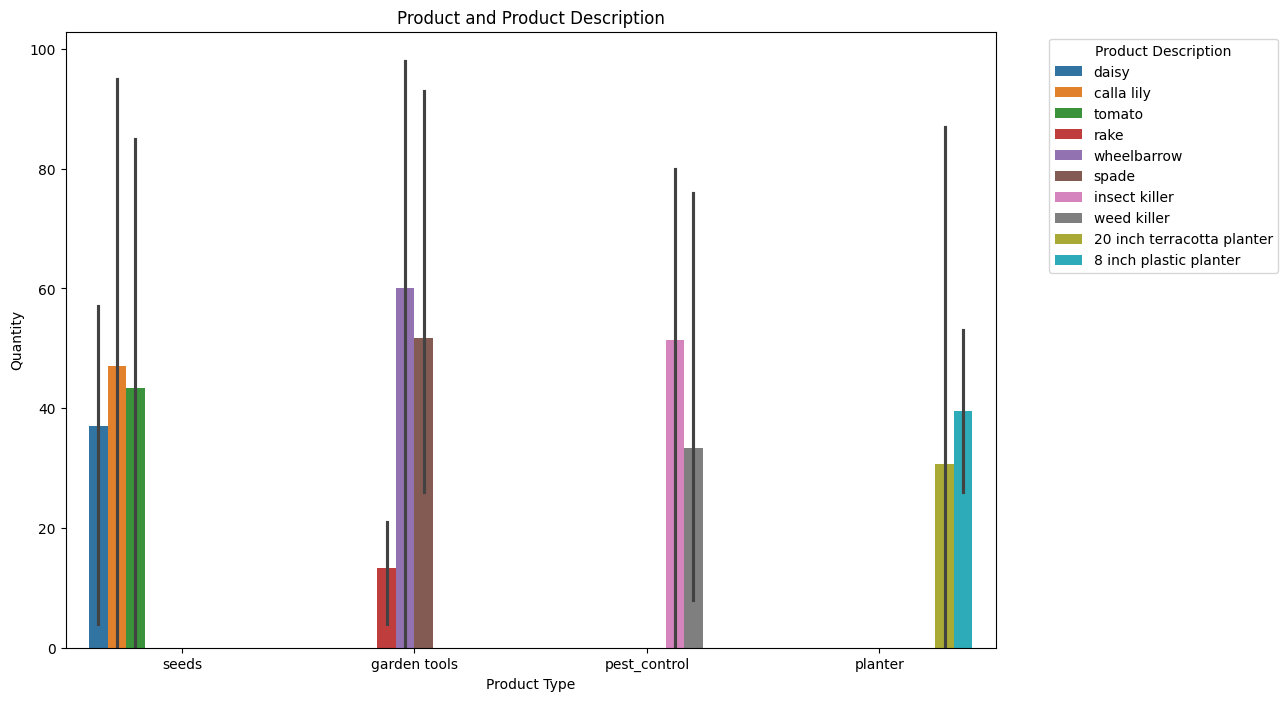

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(x='product_type', y='quantity', hue='product_description', data=inventory)
plt.xlabel("Product Type")
plt.ylabel("Quantity")
plt.title("Product and Product Description")
plt.legend(title='Product Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [6]:
staten_island = inventory.loc[:9, :]

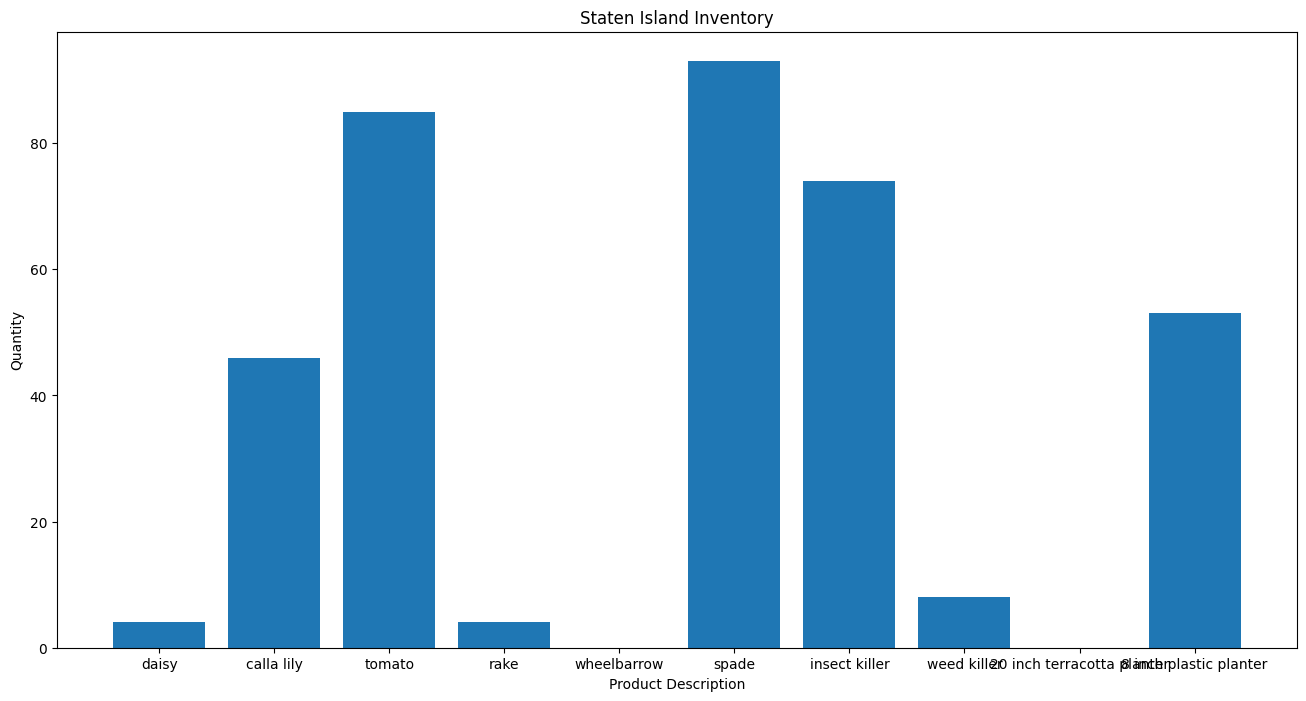

In [8]:
plt.figure(figsize=(16, 8))
plt.bar(staten_island["product_description"], staten_island["quantity"])
plt.xlabel("Product Description")
plt.ylabel("Quantity")
plt.title("Staten Island Inventory")
plt.show()

In [9]:
product_request = staten_island['product_description']

In [10]:
seed_request = inventory[(inventory['location'] == "Brooklyn") & (inventory['product_type'] == "seeds")]['product_description'].values

In [11]:
def check_quantity(quantity):
    if quantity > 0:
        return True
    else:
        False

In [12]:
inventory['in_stock'] = inventory['quantity'].apply(lambda x: True if x > 0 else False)
# inventory['in_stock'] = inventory['quantity'] > 0
# inventory['in_stock'] = [True if q > 0 else False for q in inventory['quantity']]

In [ ]:
def total_pr(quantity, price):
    return quantity * price

In [13]:
# inventory['total_value'] = inventory.apply(lambda row: total_pr(row['quantity'], row['price']), axis=1)
inventory['total_value'] = inventory['quantity'] * inventory['price']

In [14]:
inventory.head(1)

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96


In [ ]:
# inventory['full_description'] = inventory['product_type'] + " - " + inventory['product_description']
# inventory['full_description'] = inventory.apply(lambda row: \
#     '{} - {}'.format(row.product_type,
#                      row.product_description), axis=1)


In [15]:
inventory['full_description'] = inventory.apply(lambda row: f"{row.product_type} - {row.product_description}", axis=1)

In [16]:
inventory.head(1)

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
